# 분류와 회귀(regression)
+ 지도 학습 알고리즘: 분류, 회귀
+ 분류: 샘플을 몇 개의 클래스 중 하나로 분류
+ 회귀: 임의의 어떤 숫자를 예측

## KNN 알고리즘 회귀
+ 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개 선택
+ 이웃한 샘플의 타깃은 클래스가 아니라 임의의 수치
+ 새로운 샘플 x의 타깃을 예측하는 방법으로 근접한 값들의 평균 사용

### 데이터 준비
* perch (농어)의 길이와 무게

In [1]:
import numpy as np

# 농어의 길이와 무게
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

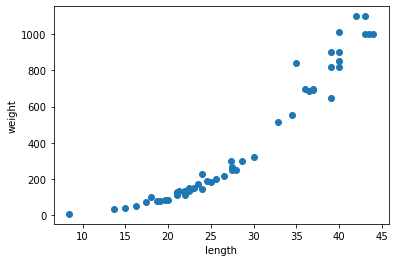

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
print(train_input.shape)
print(train_input.ndim)

(42,)
1


* 사이킷런에 사용할 훈련 데이터는 2차원 배열이여야 하므로 변환 필수
* numpy의 reshape 함수 사용
* reshape(-1, 1)과 같이 사용하면, 배열의 전체 원소 개수를 매번 외우지 않아도 되므로 편리
* reshape(-1,1) :  첫 번째 크기를 나머지 원소 개수로 채우고, 두 번째 크기를 1로 생성

In [5]:
# train_input.reshape(42,1)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1, 1)

In [6]:
print(train_input.ndim)
print(test_input.ndim)

2
2


### 결정 계수 ($ R^2$)
* 회귀의 경우 평가 방법이 분류와 다름
* 결정계수(coefficient of determination)로 평가

$ R^2$ = 1 - { (타깃-예측)$^2$의 합 / (타깃-평균)$2$의 합 }

* 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더함
* 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눈다 
* 타깃의 평균 정도를 예측하는 수준 :  $ R^2$는 0에 근접
* 예측이 타깃과 근접 : $ R^2$는 1에 근접

### KNN 회귀 모델 훈련
* perch(농어)의 길이를 가지고 무게 예측

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

#### 결정계수 확인

In [9]:
r2 = knr.score(test_input, test_target)
print('결정계수: {}'.format(r2))

결정계수: 0.992809406101064


* $ R^2$가 직관적으로 얼마나 좋은지 이해하기는 어려움
* MAE (Mean_Abolute_Error) : 타깃과 예측의 절댓값 오차를 평균하여 반환

In [10]:
from sklearn.metrics import mean_absolute_error

In [11]:
test_pred = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_pred)
print('MAE: {}'.format(mae))

MAE: 19.157142857142862


##### MAE 구하는 함수 생성

In [12]:
def get_MAE(y, y_hat):
    return sum(abs(y - y_hat)) / y.shape[0]

In [13]:
print('MAE: {}'.format(get_MAE(test_target, test_pred)))

MAE: 19.157142857142862


---

## 과대적합 vs 과소적합

### 과대적합(overfitting)
* 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면, 모델이 훈련 세트에 과대적합되었다고 말한다. 
* 훈련 세트에만 잘 맞는 모델이기 때문에,  테스트 세트와 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않는다

### 과소적합(underfitting)
* 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 낮은 경우
* 즉, 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 

### 문제 해결
##### 과대적합
* 과대적합일 경우 모델을 덜 복잡하게 만들어야 한다.
* K-NN의 경우 k 값을 증가

##### 과소적합
* 모델을 좀더 복잡하게 만들어서 해결
* K-NN에서 K의 값을 감소
* 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따름  

#### EX)

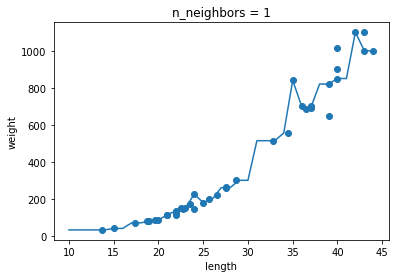

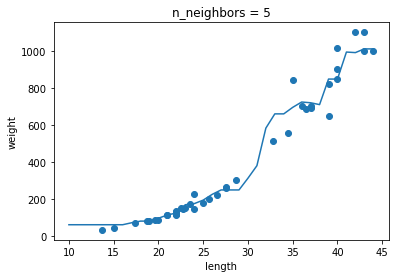

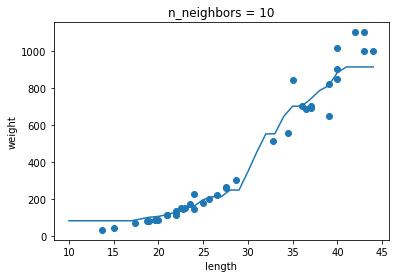

In [14]:
# KNN 회귀 객체 생성
knr = KNeighborsRegressor()

# 10에서 45까지 x 좌표 생성 (농어(perch)의 길이)
x = np.arange(10, 45).reshape(-1, 1)

# k = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for k in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = k
    knr.fit(train_input, train_target)

    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(k))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

* n_neighbors = 1 : 과적합으로 보임
* n_neighbors = 5 : 적당
* n_neighbors = 10 : 과소적합으로 보임